In [1]:
import pickle as pkl
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import copulagp.marginal as mg

def subsample(x,y,n=20000):
    assert len(x)==len(y)
    N = len(x)
    if n>N:
        return x, y
    subset = np.arange(N)
    np.random.shuffle(subset)
    subset = subset[:n]
    # add extremes
    extreme_idxs = [np.argmin(x), np.argmax(x), np.argmin(y), np.argmax(y)]
    i = 0
    for eidx in extreme_idxs:
        if eidx not in subset:
            while subset[i] in extreme_idxs:
                i+=1
            subset[i] = eidx
            i+=1
    return x[subset], y[subset]
            

In [2]:
session = 'M3_D18_2020-11-21_14-29-49'
data = pd.read_pickle(f'{session}_50ms.pkl')
data.iloc[2]

session_id                               M3_D18_2020-11-21_14-29-49
cluster_id                                                       12
spikes_per50ms    [[0.17351680745402503, 0.2128912512133495, 0.2...
Name: 10, dtype: object

In [3]:
session_id=0
[ds_rate, ds_vel, ds_pos, trial_num, trial_type] = data.iloc[session_id].spikes_per50ms
#spike_rate_in_time
ds_pos

ValueError: too many values to unpack (expected 5)

In [ ]:
plt.scatter(ds_pos[trial_type==0],ds_vel[trial_type==0],alpha=0.01)
plt.scatter(ds_pos[trial_type==1],ds_vel[trial_type==1],alpha=0.01)
plt.xlabel("position, cm")
plt.ylabel("vel, cm/s?")

In [5]:
# len(ds_pos)
np.unique(ds_rate[trial_type==0])

NameError: name 'ds_rate' is not defined

In [6]:
plt.hist(ds_vel,bins=20)

NameError: name 'ds_vel' is not defined

In [69]:
# %time u_vel_t0 = mg.fast_signal2uniform(ds_vel[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50,old=True)
# %time u_rate_t0 = mg.zeroinflated_signal2uniform(ds_rate[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50)
# %time u_vel_t1 = mg.fast_signal2uniform(ds_vel[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50,old=True)
# %time u_rate_t1 = mg.zeroinflated_signal2uniform(ds_rate[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50)

In [72]:
u_vel_t0, u_rate_t0, u_vel_t1, u_rate_t1 = [],[],[],[]
for session_id in tqdm(range(len(data))):
    [ds_rate, ds_vel, ds_pos, _, trial_type] = data.iloc[session_id].spikes_per50ms
    if session_id==0:
        ds_vel_all=ds_vel
        u_vel_t0_all = mg.zeroinflated_signal2uniform(ds_vel[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50)
        u_vel_t1_all = mg.zeroinflated_signal2uniform(ds_vel[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50)
    else:
        assert np.allclose(ds_vel_all,ds_vel)
    u_vel_t0.append(u_vel_t0_all)
    u_rate_t0.append(mg.zeroinflated_signal2uniform(ds_rate[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50))
    u_vel_t1.append(u_vel_t1_all)
    u_rate_t1.append(mg.zeroinflated_signal2uniform(ds_rate[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50))
data['u_vel_t0']=u_vel_t0
data['u_rate_t0']=u_rate_t0
data['u_vel_t1']=u_vel_t1
data['u_rate_t1']=u_rate_t1
data.to_pickle(f"{session}_u.pkl")

  0%|          | 0/23 [00:00<?, ?it/s]

(array([[2477., 2446., 2326., 2327., 2393., 2391., 2287., 2338., 2557.,
         2541.],
        [1479., 1669., 2941., 2581., 2513., 2519., 2537., 2652., 2593.,
         2599.],
        [2206., 2414., 2418., 2428., 2434., 2362., 2440., 2386., 2529.,
         2466.],
        [2007., 2219., 2151., 2232., 2237., 2078., 1787., 3216., 3129.,
         3027.],
        [1575., 1347., 2841., 2428., 2639., 2529., 2556., 2583., 2690.,
         2895.],
        [2267., 2383., 2342., 2506., 2470., 2244., 2510., 2470., 2377.,
         2514.],
        [2243., 2446., 2367., 2432., 2354., 2516., 2388., 2429., 2428.,
         2480.],
        [2022., 1605., 2264., 2298., 2781., 2565., 2586., 2546., 2697.,
         2719.],
        [2253., 2433., 2370., 2430., 2393., 2429., 2423., 2470., 2390.,
         2492.],
        [2254., 2441., 2464., 2374., 2339., 2449., 2489., 2446., 2433.,
         2394.],
        [2385., 2341., 2477., 2443., 2466., 2394., 2425., 2351., 2414.,
         2387.],
        [2295., 2439.

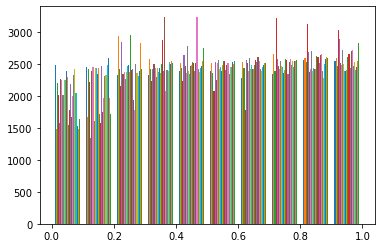

In [73]:
plt.hist(u_rate_t0)

In [74]:
ds_pos.shape

(34870,)

# Serialize

In [5]:
import glob

cohorts = glob.glob("_cohort*")
cohort = cohorts[3]
cohort

'_cohort5'

In [6]:
# session_list = glob.glob(f"unified_binned/{cohort}/*")
# for session in tqdm(session_list):
#     save_name=(session.split('/')[-1]).split(".pkl")[0]
#     save_name = f"unified_uniform/{cohort}/{save_name}_u.pkl"
#     data = pd.read_pickle(session)
#     u_vel_t0, u_rate_t0, u_vel_t1, u_rate_t1 = [],[],[],[]
#     for cluster_id in tqdm(range(len(data))):
#         [ds_rate, ds_vel, ds_pos, ds_acc, _, trial_type] = data.iloc[cluster_id].spikes_per50ms
#         if cluster_id==0:
#             ds_vel_all=ds_vel
#             u_vel_t0_all = mg.zeroinflated_signal2uniform(ds_vel[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50)
#             u_vel_t1_all = mg.zeroinflated_signal2uniform(ds_vel[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50)
#         else:
#             assert np.allclose(ds_vel_all,ds_vel)
#         u_vel_t0.append(u_vel_t0_all)
#         u_rate_t0.append(mg.zeroinflated_signal2uniform(ds_rate[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50))
#         u_vel_t1.append(u_vel_t1_all)
#         u_rate_t1.append(mg.zeroinflated_signal2uniform(ds_rate[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50))
#     data['u_vel_t0']=u_vel_t0
#     data['u_rate_t0']=u_rate_t0
#     data['u_vel_t1']=u_vel_t1
#     data['u_rate_t1']=u_rate_t1
#     data.to_pickle(save_name)
# #     try:
# #         open(save_name,'rb')
# #     except:
# #         print(save_name)
        

In [7]:
from multiprocessing import Pool

session_list = glob.glob(f"unified_binned/{cohort}/*")
def process_session(session):
    print(session, ' started')
    save_name=(session.split('/')[-1]).split(".pkl")[0]
    save_name = f"unconditional_uniform/{cohort}/{save_name}_u.pkl"
    data = pd.read_pickle(session)
    u_vel, u_acc, u_rate = [], [], []
    this_u_vel=None
    for cluster_id in tqdm(range(len(data))):
        [ds_rate, ds_vel, ds_pos, ds_acc, _, trial_type] = data.iloc[cluster_id].spikes_per50ms
        if cluster_id==0:
            ds_vel_all=ds_vel
            this_u_vel = mg.zeroinflated_signal2uniform(ds_vel,ds_pos,numPointsPerSigma=50)
            this_u_acc = mg.zeroinflated_signal2uniform(ds_acc,ds_pos,numPointsPerSigma=50)
        else:
            assert np.allclose(ds_vel_all,ds_vel)
        this_u_rate = mg.zeroinflated_signal2uniform(ds_rate,ds_pos,numPointsPerSigma=50)
        u_vel.append(this_u_vel)
        u_acc.append(this_u_acc)
        u_rate.append(this_u_rate)
    data['u_vel']=u_vel
    data['u_acc']=u_acc
    data['u_rate']=u_rate
    data.to_pickle(save_name)
    print(session, ' finished')
    
pool = Pool(processes=32)                         # Create a multiprocessing Pool
pool.map(process_session, session_list[:])  # process data_inputs iterable with pool
#     try:
#         open(save_name,'rb')
#     except:
#         print(save_name)
        

unified_binned/_cohort5/M2_D12_2019-07-02_13-52-55_50ms.pklunified_binned/_cohort5/M1_D7_2019-06-25_13-29-10_50ms.pklunified_binned/_cohort5/M2_D5_2019-06-21_14-17-47_50ms.pklunified_binned/_cohort5/M2_D1_2019-06-17_13-48-10_50ms.pklunified_binned/_cohort5/M2_D3_2019-06-19_13-42-04_50ms.pklunified_binned/_cohort5/M1_D9_2019-06-27_13-17-22_50ms.pklunified_binned/_cohort5/M1_D8_2019-06-26_13-31-11_50ms.pkl unified_binned/_cohort5/M1_D6_2019-06-24_14-00-07_50ms.pklunified_binned/_cohort5/M1_D2_2019-06-18_13-25-18_50ms.pklunified_binned/_cohort5/M1_D16_2019-07-08_13-52-45_50ms.pkl unified_binned/_cohort5/M1_D13_2019-07-03_13-19-48_50ms.pklunified_binned/_cohort5/M1_D1_2019-06-17_13-10-34_50ms.pklunified_binned/_cohort5/M2_D10_2019-06-28_14-25-15_50ms.pklunified_binned/_cohort5/M2_D14_2019-07-04_14-09-44_50ms.pklunified_binned/_cohort5/M1_D10_2019-06-28_13-31-54_50ms.pklunified_binned/_cohort5/M1_D14_2019-07-04_13-33-14_50ms.pklunified_binned/_cohort5/M1_D4_2019-06-20_13-25-59_50ms.pklunifi

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

unified_binned/_cohort5/M2_D4_2019-06-20_14-10-17_50ms.pkl  finished
unified_binned/_cohort5/M1_D15_2019-07-05_13-25-15_50ms.pkl  finished
unified_binned/_cohort5/M2_D3_2019-06-19_13-42-04_50ms.pkl  finished
unified_binned/_cohort5/M2_D10_2019-06-28_14-25-15_50ms.pkl  finished
unified_binned/_cohort5/M1_D19_2019-07-11_13-29-24_50ms.pkl  finished
unified_binned/_cohort5/M2_D7_2019-06-25_14-09-48_50ms.pkl  finished
unified_binned/_cohort5/M2_D1_2019-06-17_13-48-10_50ms.pkl  finished
unified_binned/_cohort5/M1_D13_2019-07-03_13-19-48_50ms.pkl  finished
unified_binned/_cohort5/M1_D3_2019-06-19_12-58-11_50ms.pkl  finished
unified_binned/_cohort5/M2_D14_2019-07-04_14-09-44_50ms.pkl  finished
unified_binned/_cohort5/M1_D7_2019-06-25_13-29-10_50ms.pkl  finished
unified_binned/_cohort5/M2_D12_2019-07-02_13-52-55_50ms.pkl  finished
unified_binned/_cohort5/M1_D2_2019-06-18_13-25-18_50ms.pkl  finished
unified_binned/_cohort5/M1_D6_2019-06-24_14-00-07_50ms.pkl  finished
unified_binned/_cohort5/M2_D

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]